In [3]:
!pip install pillow

In [ ]:
!pip install scikit-image

In [ ]:
!pip install opencv-python-headless numpy matplotlib scikit-image


In [13]:
import cv2
import numpy as np
from scipy.fftpack import dct
from sklearn.linear_model import LinearRegression
from skimage.metrics import structural_similarity as ssim
from PIL import Image

In [ ]:

def resize_to_match(image1, image2):
    size1 = image1.shape[:2]  # (height, width)
    size2 = image2.shape[:2]
    
    if size1 != size2:
        image2_resized = cv2.resize(image2, (size1[1], size1[0]), interpolation=cv2.INTER_AREA)
        return image2_resized
    else:
        return image2


reference = 'Samsung.jpg'
our_solution = 'FINAL.png'
dualfish = 'Dualfish.jpg'
ep =  'EP.jpg'
ip = 'IP.jpg'
manmethod = 'ManMethod.jpg'
svp = 'SVP.jpg'
WeiMethod = 'WeiMethod.jpg'



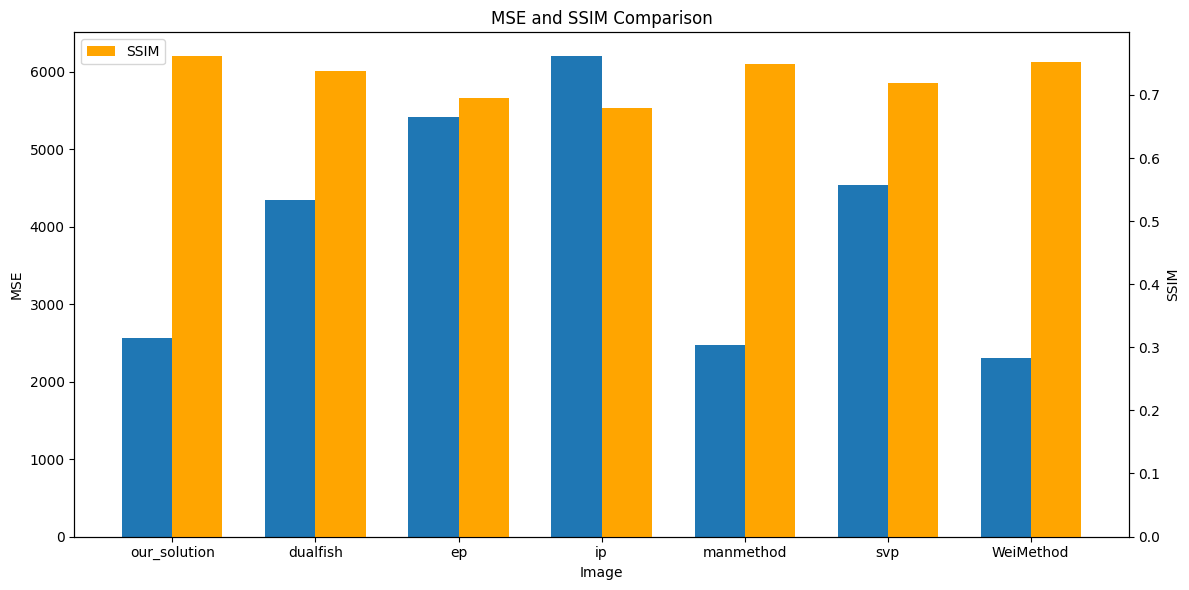

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim

def resize_to_match(image1, image2):
    size1 = image1.shape[:2]  # (height, width)
    size2 = image2.shape[:2]
    
    if size1 != size2:
        image2_resized = cv2.resize(image2, (size1[1], size1[0]), interpolation=cv2.INTER_AREA)
        return image2_resized
    else:
        return image2

def flip_horizontal(image):
    return cv2.flip(image, 1)

def compute_mse(imageA, imageB):
    # Compute the Mean Squared Error between the two images
    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])
    return err

def compare_images(imageA, imageB):
    mse_value = compute_mse(imageA, imageB)
    ssim_value = ssim(imageA, imageB, win_size=7, channel_axis=2)
    return mse_value, ssim_value

def load_image(path):
    return cv2.imread(path)

def plot_comparisons(results, reference_name):
    labels, mses, ssims = zip(*results)
    
    x = np.arange(len(labels))
    width = 0.35

    fig, ax1 = plt.subplots(figsize=(12, 6))

    ax1.bar(x - width/2, mses, width, label='MSE')
    ax1.set_xlabel('Image')
    ax1.set_ylabel('MSE')
    ax1.set_title('MSE and SSIM Comparison')
    ax1.set_xticks(x)
    ax1.set_xticklabels(labels)
    
    ax2 = ax1.twinx()
    ax2.bar(x + width/2, ssims, width, label='SSIM', color='orange')
    ax2.set_ylabel('SSIM')

    fig.tight_layout()
    plt.legend(loc='upper left')
    plt.show()

reference_image = load_image('Samsung.jpg')

image_paths = {
    'our_solution': 'FINAL.png',
    'dualfish': 'Dualfish.jpg',
    'ep':  'EP.jpg',
    'ip': 'IP.jpg',
    'manmethod': 'ManMethod.jpg',
    'svp': 'SVP.jpg',
    'WeiMethod': 'WeiMethod.jpg'
}

results = []
for name, path in image_paths.items():
    image = load_image(path)
    if name == 'our_solution':
        image = flip_horizontal(image)
    resized_image = resize_to_match(reference_image, image)
    mse_value, ssim_value = compare_images(reference_image, resized_image)
    results.append((name, mse_value, ssim_value))

plot_comparisons(results, 'Samsung')


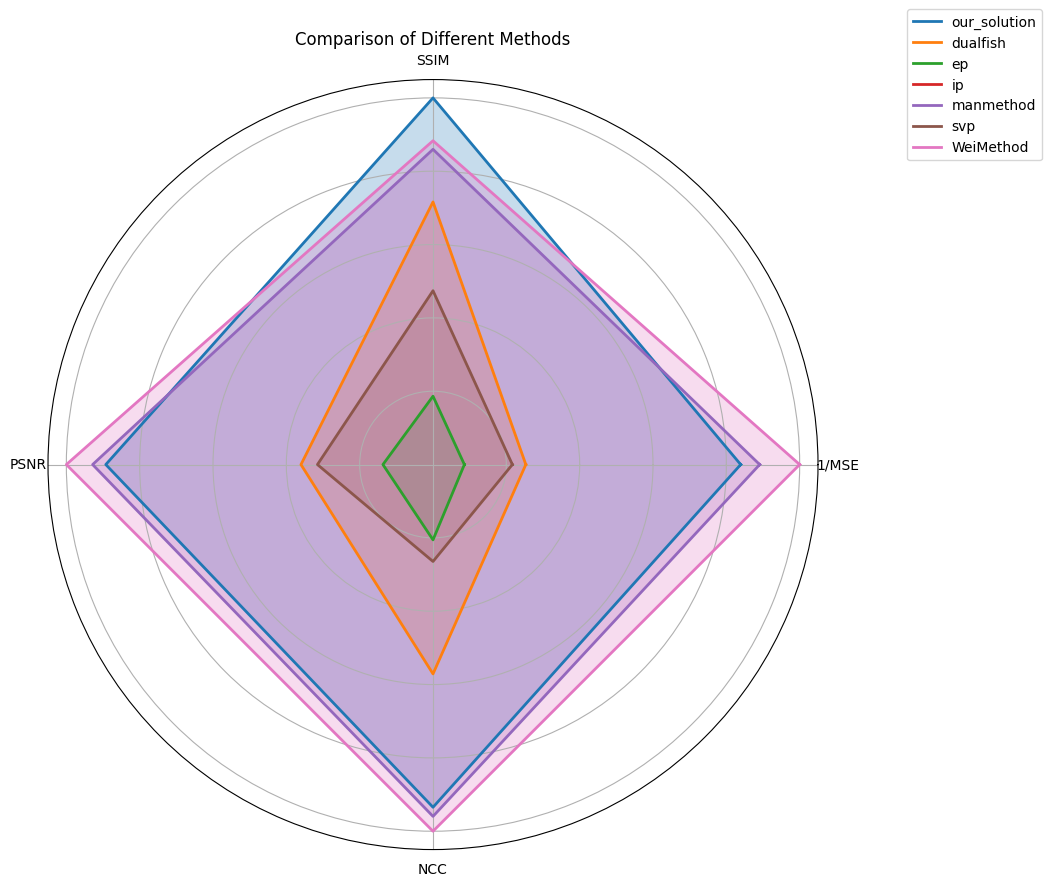

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim
from sklearn.preprocessing import MinMaxScaler

def resize_to_match(image1, image2):
    size1 = image1.shape[:2]  # (height, width)
    size2 = image2.shape[:2]
    
    if size1 != size2:
        image2_resized = cv2.resize(image2, (size1[1], size1[0]), interpolation=cv2.INTER_AREA)
        return image2_resized
    else:
        return image2

def flip_horizontal(image):
    return cv2.flip(image, 1)

def compute_mse(imageA, imageB):
    # Compute the Mean Squared Error between the two images
    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])
    return err

def compute_psnr(imageA, imageB):
    mse = compute_mse(imageA, imageB)
    if mse == 0:
        return float('inf')
    PIXEL_MAX = 255.0
    return 20 * np.log10(PIXEL_MAX / np.sqrt(mse))

def compute_ncc(imageA, imageB):
    imageA_gray = cv2.cvtColor(imageA, cv2.COLOR_BGR2GRAY)
    imageB_gray = cv2.cvtColor(imageB, cv2.COLOR_BGR2GRAY)
    ncc = cv2.matchTemplate(imageA_gray, imageB_gray, cv2.TM_CCORR_NORMED)
    return ncc[0][0]

def compare_images(imageA, imageB):
    mse_value = compute_mse(imageA, imageB)
    ssim_value = ssim(imageA, imageB, win_size=7, channel_axis=2)
    psnr_value = compute_psnr(imageA, imageB)
    ncc_value = compute_ncc(imageA, imageB)
    return mse_value, ssim_value, psnr_value, ncc_value

def load_image(path):
    return cv2.imread(path)

def plot_radar_chart(results, metrics):
    labels = list(results.keys())
    stats = [results[label] for label in labels]

    scaler = MinMaxScaler()
    normalized_stats = scaler.fit_transform(stats)
    normalized_stats = [stat.tolist() + stat.tolist()[:1] for stat in normalized_stats]

    num_vars = len(metrics)

    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))

    for stat, label in zip(normalized_stats, labels):
        ax.plot(angles, stat, label=label, linewidth=2)
        ax.fill(angles, stat, alpha=0.25)

    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(metrics)

    plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
    plt.title('Comparison of Different Methods')
    plt.show()

reference_image = load_image('Samsung.jpg')

image_paths = {
    'our_solution': 'FINAL.png',
    'dualfish': 'Dualfish.jpg',
    'ep':  'EP.jpg',
    'ip': 'IP.jpg',
    'manmethod': 'ManMethod.jpg',
    'svp': 'SVP.jpg',
    'WeiMethod': 'WeiMethod.jpg'
}

metrics = ['1/MSE', 'SSIM', 'PSNR', 'NCC']
results = {}
for name, path in image_paths.items():
    image = load_image(path)
    if name == 'our_solution':
        image = flip_horizontal(image)
        resized_image = resize_to_match(reference_image, image)
        
    resized_image = resize_to_match(reference_image, image)
    mse_value, ssim_value, psnr_value, ncc_value = compare_images(reference_image, resized_image)
    results[name] = [1/mse_value, ssim_value, psnr_value, ncc_value]

plot_radar_chart(results, metrics)


              Aggregate
WeiMethod      3.883116
our_solution   3.760614
manmethod      3.704055
dualfish       2.124557
svp            1.480268
ep             0.729647
ip             0.000000


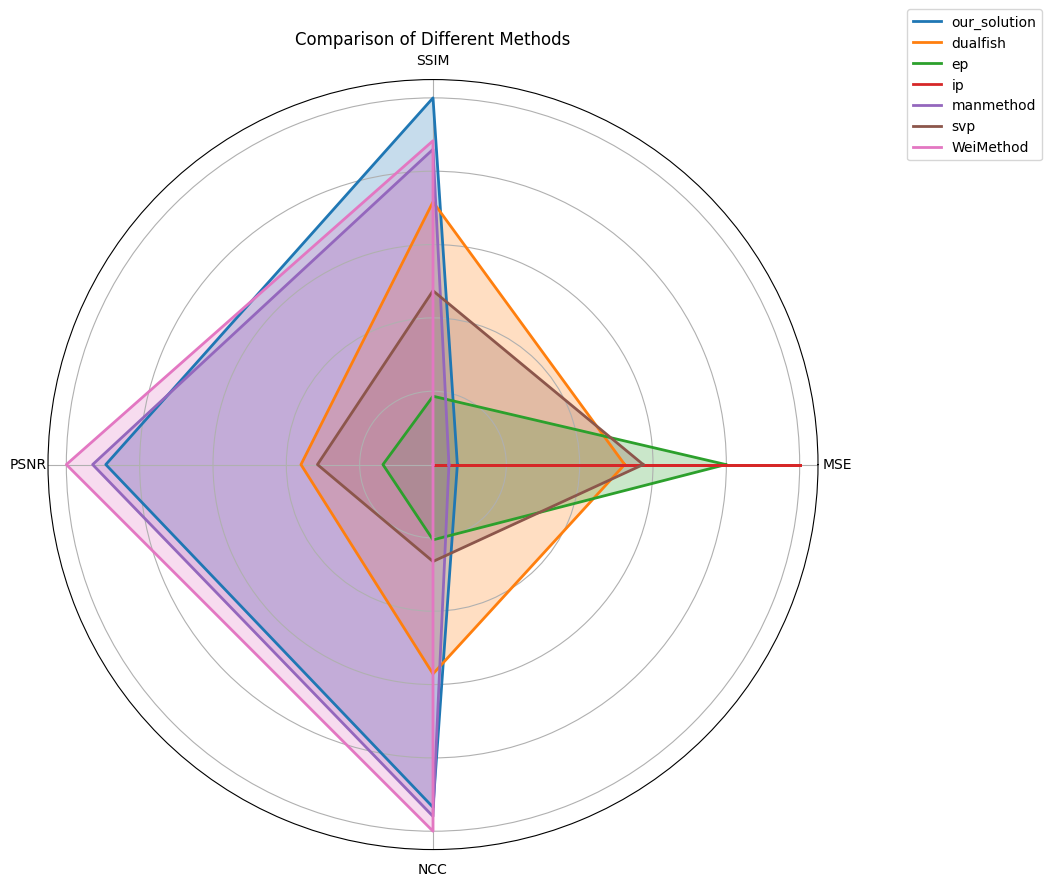

In [7]:
import pandas as pd

df = pd.DataFrame.from_dict(results, orient='index', columns=metrics)
scaler = MinMaxScaler()
normalized_df = pd.DataFrame(scaler.fit_transform(df), columns=metrics, index=df.index)
normalized_df['MSE'] = 1 - normalized_df['MSE']
normalized_df['Aggregate'] = normalized_df.sum(axis=1)
ranked_methods = normalized_df.sort_values(by='Aggregate', ascending=False)

print(ranked_methods[['Aggregate']])
plot_radar_chart(results, metrics)

In [12]:
def resize_to_match(image1, image2):
    size1 = image1.shape[:2]  # (height, width)
    size2 = image2.shape[:2]
    print(image1.shape[:2])
    print(image2.shape[:2])
    
    if size1 != size2:
        image2_resized = cv2.resize(image2, (size1[1], size1[0]), interpolation=cv2.INTER_AREA)
        return image2_resized
    else:
        return image2

def flip_horizontal(image):
    return cv2.flip(image, 1)


reference_image_path = 'Samsung.jpg'
input_image_path = 'FINAL.png'
output_image_path = 'output_final.jpg'

reference_image = cv2.imread(reference_image_path)
input_image = cv2.imread(input_image_path)


resized_image = resize_to_match(reference_image, input_image)
flipped_image = flip_horizontal(resized_image)
cv2.imwrite(output_image_path, flipped_image)

(2736, 5472)
(500, 1800)


True